# EDA - Dataset PIMA Diabetes

In [2]:
#! pip install numpy pandas
#! pip install matplotlib seaborn
#! pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales.

El objetivo del conjunto de datos es predecir diagnósticamente si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. Se impusieron varias restricciones a la selección de estos casos de una base de datos más amplia. En concreto, todos los pacientes son mujeres de al menos 21 años y de ascendencia india pima.

La variable target es Outcome:
- 1: diabético
- 2: no diabético


In [3]:
df = pd.read_csv('./diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# show statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
print("Número de positivos =", df["Outcome"][ df["Outcome"] == 1 ].count() )
print("Número de negativos =", df["Outcome"][ df["Outcome"] == 0 ].count() )

Número de positivos = 268
Número de negativos = 500


In [7]:
# missing values
df.isna().sum() / len(df)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

## EDA
### 1. Distribución de la variable objetivo (Outcome): Proporción de personas con y sin diabetes

C:\Users\brjap\AppData\Local\Temp\ipykernel_20316\3979479273.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='viridis')


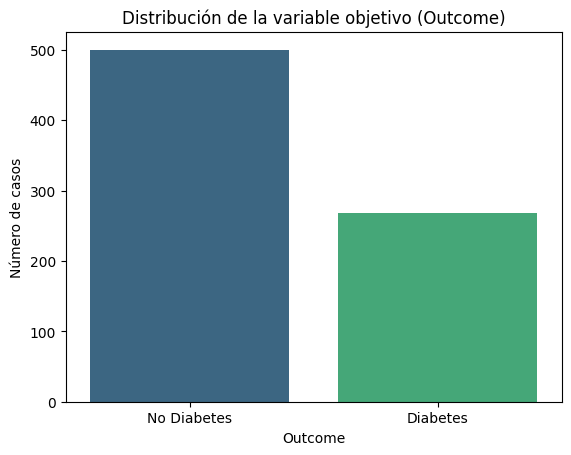

In [8]:
# Conteo de valores de la variable 'Outcome'
outcome_counts = df['Outcome'].value_counts()

# Gráfico de barras
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='viridis')
plt.xlabel('Outcome')
plt.ylabel('Número de casos')
plt.title('Distribución de la variable objetivo (Outcome)')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()


### 2. Análisis de las variables numéricas
Crear histogramas que muestren la distribución de los datos, diferenciando entre personas con y sin diabetes

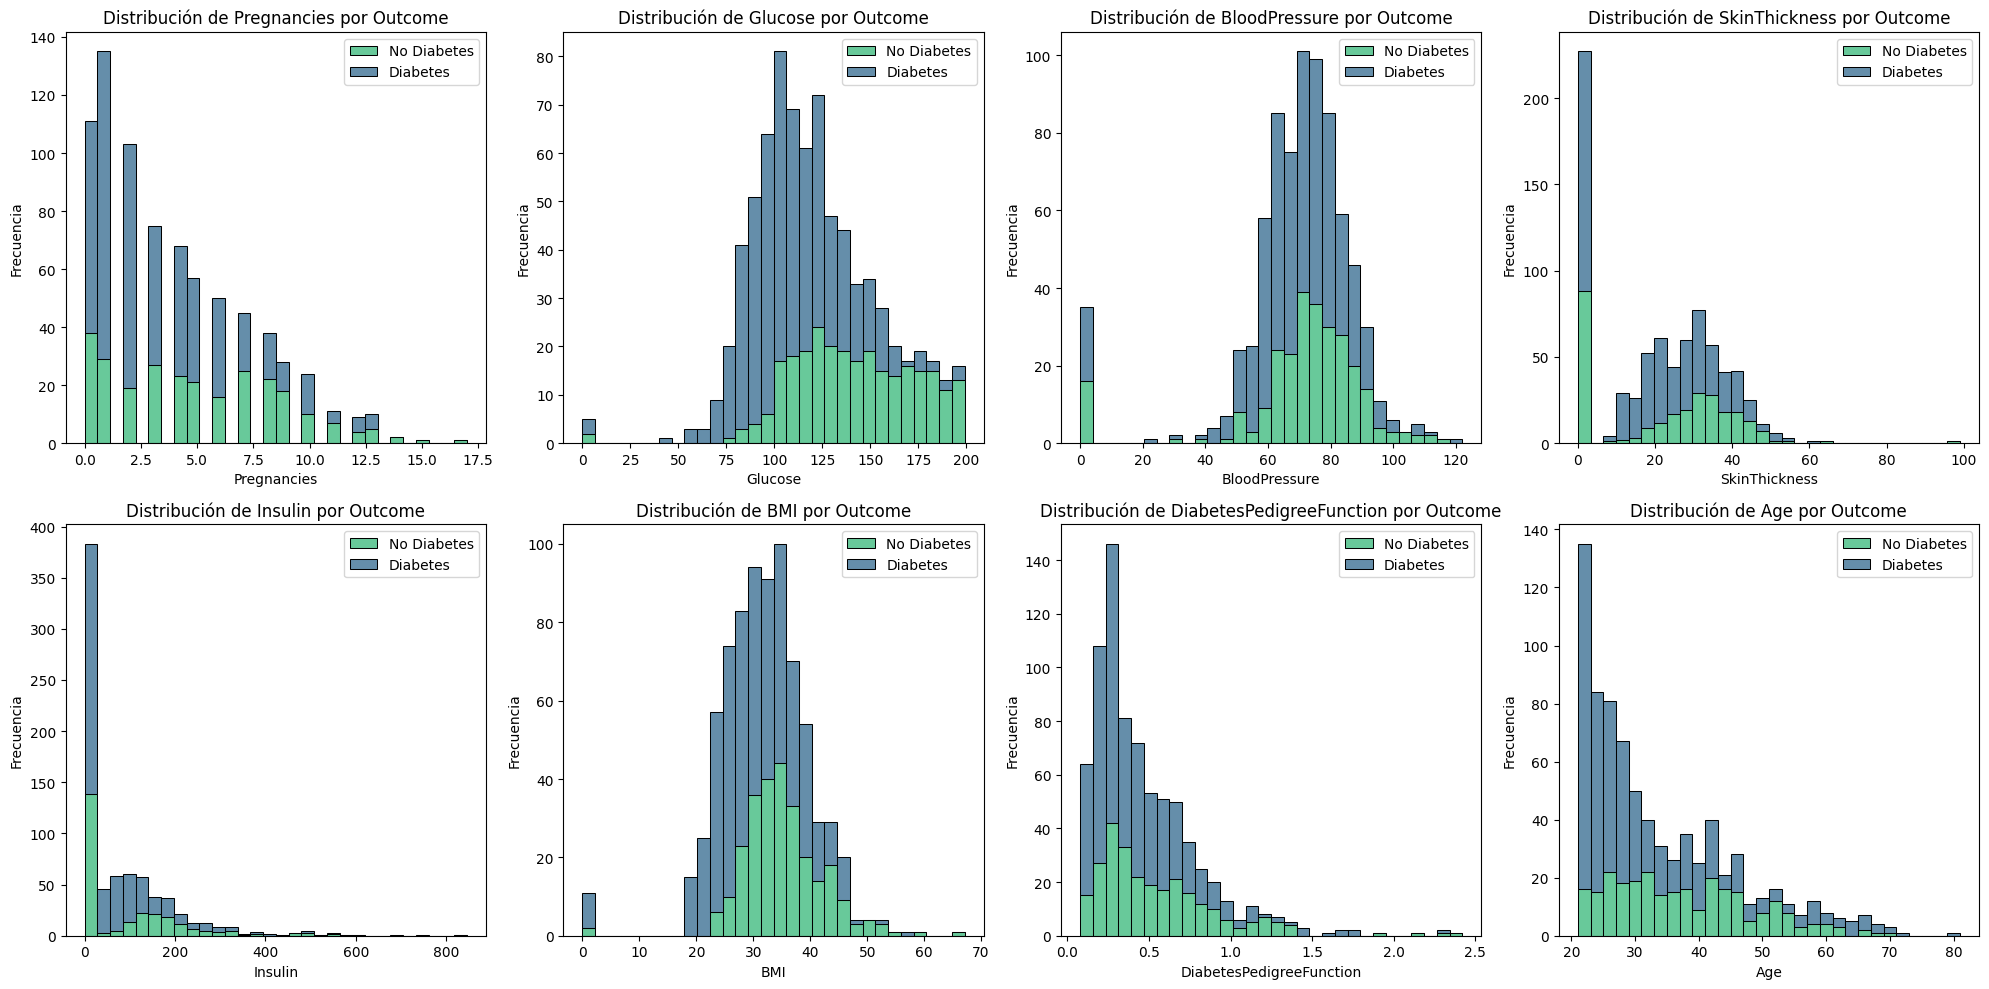

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables numéricas
numeric_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Crear una figura y una cuadrícula de subplots 2x4
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()  # Convertir la matriz de ejes en una lista unidimensional

# Iterar sobre las variables numéricas y los ejes correspondientes
for i, var in enumerate(numeric_vars):
    sns.histplot(data=df, x=var, hue='Outcome', multiple='stack', 
                 palette='viridis', bins=30, ax=axes[i])
    axes[i].set_title(f'Distribución de {var} por Outcome')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')
    axes[i].legend(['No Diabetes', 'Diabetes'])

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

### 3. Correlaciones entre variables

In [10]:
# correlation heatmap
corr_matrix = df.corr()

# Find the pairs of columns that have a correlation coefficient above 0.8
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr >= 0]
high_corr = high_corr[high_corr.index.get_level_values(0) != high_corr.index.get_level_values(1)]

# Print the list of highly correlated column pairs
print("Lista de pares de variables ordenadas por su correlación:")
high_corr.sort_values(ascending=False).drop_duplicates().head(10)

Lista de pares de variables ordenadas por su correlación:


Pregnancies    Age              0.544341
Glucose        Outcome          0.466581
Insulin        SkinThickness    0.436783
BMI            SkinThickness    0.392573
Glucose        Insulin          0.331357
BMI            Outcome          0.292695
BloodPressure  BMI              0.281805
Glucose        Age              0.263514
BloodPressure  Age              0.239528
Outcome        Age              0.238356
dtype: float64

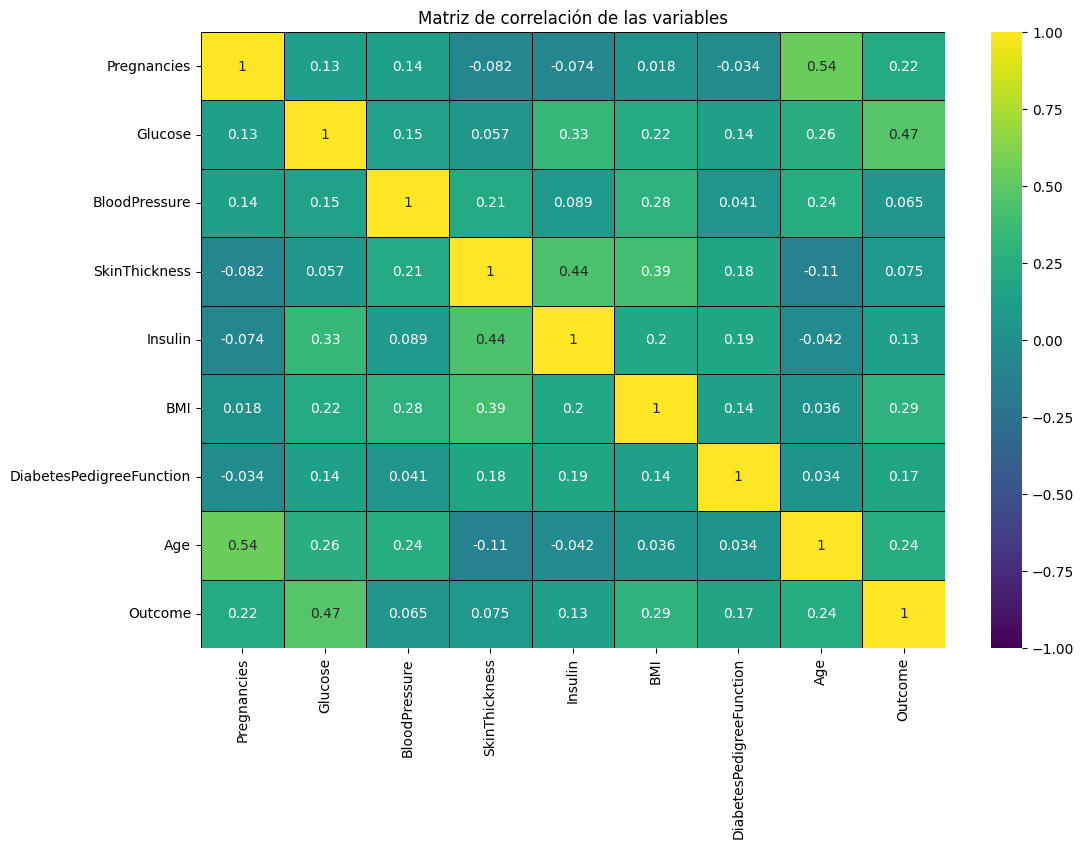

In [11]:
# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, center=0, linewidths=0.5, linecolor='black')
plt.title('Matriz de correlación de las variables')
plt.show()

### 4. IMC vs. Glucosa
Diagrama de dispersión que muestra la relación entre el IMC y los niveles de glucosa, coloreado por la variable 'Outcome':

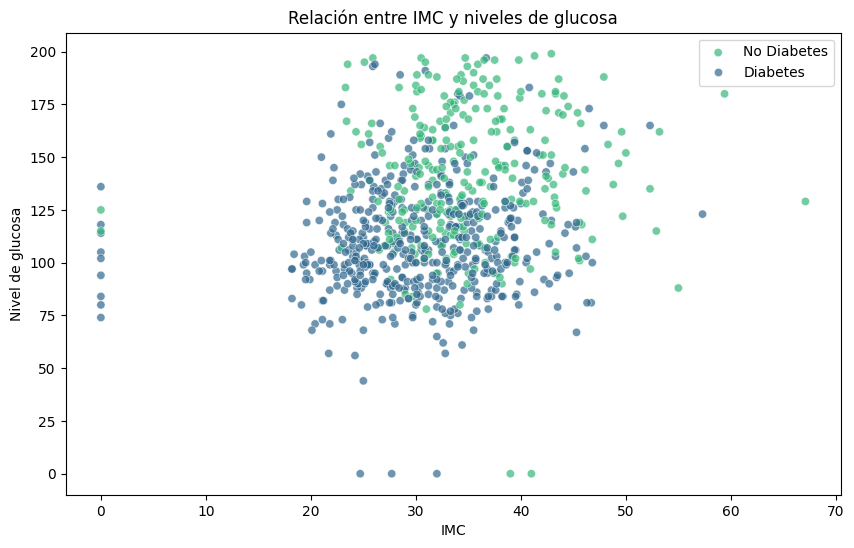

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BMI', y='Glucose', hue='Outcome', palette='viridis', alpha=0.7)
plt.title('Relación entre IMC y niveles de glucosa')
plt.xlabel('IMC')
plt.ylabel('Nivel de glucosa')
plt.legend(['No Diabetes', 'Diabetes'])
plt.show()

### 5. Edad y Diabetes
Gráfico de cajas que compara la distribución de edades entre personas con y sin diabetes

C:\Users\brjap\AppData\Local\Temp\ipykernel_20316\3760744926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y='Age', palette='viridis')


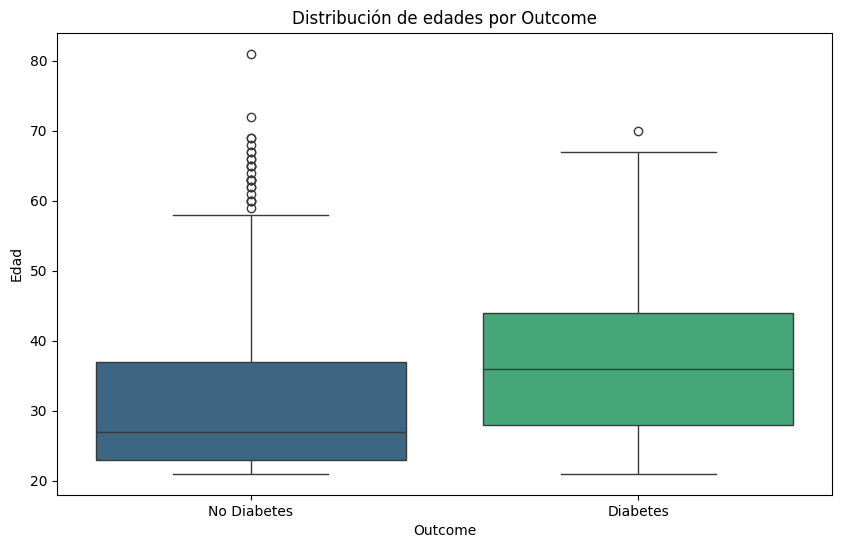

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Outcome', y='Age', palette='viridis')
plt.title('Distribución de edades por Outcome')
plt.xlabel('Outcome')
plt.ylabel('Edad')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

En un diagrama de caja y bigotes, los "bigotes" representan la variabilidad de los datos fuera del rango intercuartílico (IQR), que es la distancia entre el primer cuartil (Q1) y el tercer cuartil (Q3).

Por convención, los bigotes suelen extenderse hasta 1.5 veces el IQR desde los cuartiles Q1 y Q3. Si no existen datos más allá de este rango, los bigotes se ajustan a los valores mínimo y máximo de los datos.

Cuando los bigotes inferiores están muy cerca de la caja, indica que los datos por debajo del primer cuartil están concentrados en un rango estrecho. Esto sugiere una baja dispersión en la parte inferior de la distribución. En otras palabras, los valores mínimos no se alejan significativamente del primer cuartil, lo que resulta en bigotes inferiores cortos o casi inexistentes.

Esta característica puede ser indicativa de una distribución asimétrica o sesgada, donde la mayoría de los datos se agrupan en un extremo de la escala. Es importante analizar este comportamiento en el contexto de los datos específicos para comprender mejor su distribución y posibles implicaciones.

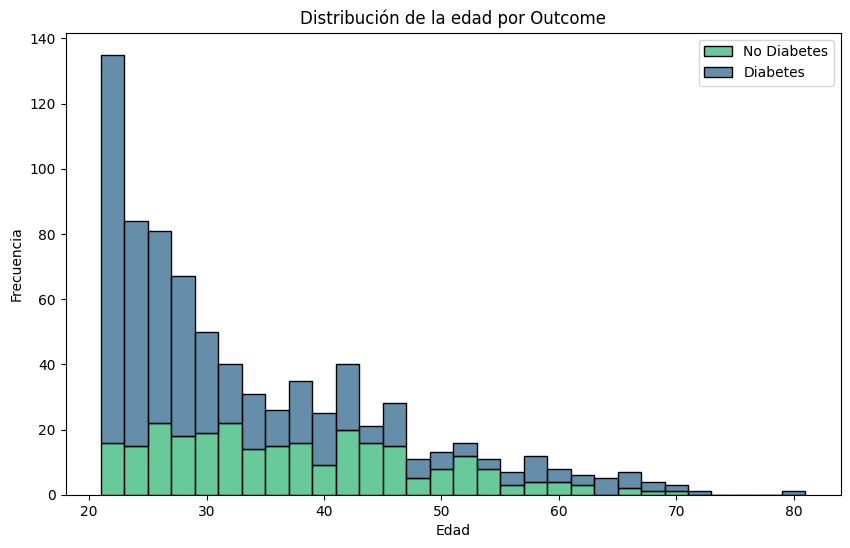

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Outcome', multiple='stack', palette='viridis', bins=30)
plt.title('Distribución de la edad por Outcome')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(['No Diabetes', 'Diabetes'])
plt.show()